<a href="https://colab.research.google.com/github/lisabortiz/Data-Science-Portfolio/blob/main/Project_1/Project_1_Description_for_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Transaction Success Prediction



This project looks at transaction data. One very important subset of performing data science on transaction data consists of binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this project, we want to predict whether or not a future customer will make a transaction based on their transaction data.

The data provided has the same structure as real data typically available to solve this problem. The columns of the input variables have been anonymized, so there is no intuition available to help judge which variables might be more important, so all variables need to be considered equally.

The project should be done using the Gaussian Naive Bayes classification techniques as covered in class. In this directory is included a recommended "To Do" list for the
project.

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.big.csv


# "What's going on?" Problem Definition

**Type of Problem**

Our target was graciously provided for us, "target".

Given that our target is binary, we have a classification problem for which a supervised learning method would be great!
In this case, we are planning to use Gaussian Naïve Bayes algorithm.

In [1]:
#load libraries
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import sklearn

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# "Initial Setup" Data Collection/Sources



Data was provided by Robert Citek, which is shared through AWS for access.

In [2]:
#assign paths from servers
base_path ="https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/"
train_path = base_path + 'Transaction.train.big.csv'


In [3]:
#File Path given by Robert Citek.
train_path

'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.big.csv'

In [4]:
#load data from CSV File, and check first 5 line rows using *.head method
train_orig = pd.read_csv(train_path)
train_orig.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,0,train_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,train_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,train_3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,4,train_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
train_orig.tail()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
1049995,1049995,train_1049995,1.0,11.3251,16.4148,20.5955,NaN,-6.3011,NaN,NaN,...,NaN,1.3921,NaN,-16.4925,NaN,NaN,NaN,NaN,NaN,14.4421
1049996,1049996,train_1049996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049997,1049997,train_1049997,0.0,8.9941,13.4127,3.9567,NaN,3.5744,NaN,NaN,...,NaN,2.0836,NaN,-18.6168,NaN,NaN,NaN,NaN,NaN,14.0689
1049998,1049998,train_1049998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049999,1049999,train_1049999,0.0,2.1828,12.3805,17.5654,NaN,8.1795,NaN,NaN,...,NaN,-12.1108,NaN,10.7608,NaN,NaN,NaN,NaN,NaN,14.1690


In [6]:
#Get a sense of the size of data set using *.shape method
train_orig.shape

(1050000, 104)

In [7]:
train_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Columns: 104 entries, Unnamed: 0 to var_100
dtypes: float64(102), int64(1), object(1)
memory usage: 833.1+ MB


In [8]:
#Return how many data entries ("elements in object") in totality using *.size method
train_orig.size

109200000

# Create a copy

In [9]:
train = train_orig.copy()
train.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,0,train_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,train_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,train_3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,4,train_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Check Data For Use

In [10]:
#total number of Null Values in Data set
train_orig.describe(include ="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1050000.0,NaN,NaN,NaN,524999.5,303109.035663,0.0,262499.75,524999.5,787499.25,1049999.0
ID_code,1050000,1050000,train_1049983,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target,180000.0,NaN,NaN,NaN,0.100222,0.300297,0.0,0.0,0.0,0.0,1.0
var_0,180000.0,NaN,NaN,NaN,7.440715,3.021636,-2.6917,5.160325,7.35095,9.511125,16.7165
var_1,180000.0,NaN,NaN,NaN,15.870166,3.010492,6.2993,13.8304,15.9346,18.061425,26.0791
...,...,...,...,...,...,...,...,...,...,...,...
var_96,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
var_97,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
var_98,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
var_99,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
train.nunique().sort_values(ascending=False)

,0
Unnamed: 0,1050000
ID_code,1050000
var_52,137280
var_86,134537
var_94,131746
...,...
var_93,0
var_96,0
var_97,0
var_98,0


In [12]:
train["target"].unique()

array([nan,  0.,  1.])

In [13]:
#total number of Null Values in Data set
train_orig.isnull()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,True,False,True,True,...,True,False,True,False,True,True,True,True,True,False
4,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049995,False,False,False,False,False,False,True,False,True,True,...,True,False,True,False,True,True,True,True,True,False
1049996,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1049997,False,False,False,False,False,False,True,False,True,True,...,True,False,True,False,True,True,True,True,True,False
1049998,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [14]:
#Check for "Unique Identifier" (label) Columns
print(f'ID_code')
print(train_orig["ID_code"].nunique())
print(f'Unamed: 0')
print(train_orig["Unnamed: 0"].nunique())
print(f'Target:')
print(train_orig["target"].nunique())

ID_code
1050000
Unamed: 0
1050000
Target:
2


In [15]:
#Total of Not Null Values
train.size - train.isna().sum().sum()

np.int64(11280000)

In [16]:
# *.iloc by index to identify nulls, data types
# Null Targets
train_orig.iloc[:,:5].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1050000 non-null  int64  
 1   ID_code     1050000 non-null  object 
 2   target      180000 non-null   float64
 3   var_0       180000 non-null   float64
 4   var_1       180000 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 40.1+ MB


In [17]:
#How many Nulls are in the Target Column
train_orig["target"].isna().sum()

np.int64(870000)

In [18]:
#Check the target column for data type, binary, balance "0:1 Ratio"
train_orig["target"].value_counts(dropna = False)

,count
target,
NaN,870000
0.0,161960
1.0,18040


In [19]:
sums = train_orig.isna().sum()
sums

,0
Unnamed: 0,0
ID_code,0
target,870000
var_0,870000
var_1,870000
...,...
var_96,1050000
var_97,1050000
var_98,1050000
var_99,1050000


In [20]:
sums > 0

,0
Unnamed: 0,False
ID_code,False
target,True
var_0,True
var_1,True
...,...
var_96,True
var_97,True
var_98,True
var_99,True


In [21]:
sums[sums > 0]

,0
target,870000
var_0,870000
var_1,870000
var_2,870000
var_3,1050000
...,...
var_96,1050000
var_97,1050000
var_98,1050000
var_99,1050000


In [22]:
#Calculate the percentage of nulls per column.
(train.isnull().sum() / len(train)) * 100

,0
Unnamed: 0,0.000000
ID_code,0.000000
target,82.857143
var_0,82.857143
var_1,82.857143
...,...
var_96,100.000000
var_97,100.000000
var_98,100.000000
var_99,100.000000


# Backup of Data

In [23]:
# make a backup
train_bak_v01 = train.copy()
train_bak_v01

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,0,train_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,train_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,train_3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,4,train_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049995,1049995,train_1049995,1.0,11.3251,16.4148,20.5955,NaN,-6.3011,NaN,NaN,...,NaN,1.3921,NaN,-16.4925,NaN,NaN,NaN,NaN,NaN,14.4421
1049996,1049996,train_1049996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049997,1049997,train_1049997,0.0,8.9941,13.4127,3.9567,NaN,3.5744,NaN,NaN,...,NaN,2.0836,NaN,-18.6168,NaN,NaN,NaN,NaN,NaN,14.0689
1049998,1049998,train_1049998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Restore from backup
train = train_bak_v01.copy()
train

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,0,train_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,train_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,train_3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,4,train_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049995,1049995,train_1049995,1.0,11.3251,16.4148,20.5955,NaN,-6.3011,NaN,NaN,...,NaN,1.3921,NaN,-16.4925,NaN,NaN,NaN,NaN,NaN,14.4421
1049996,1049996,train_1049996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049997,1049997,train_1049997,0.0,8.9941,13.4127,3.9567,NaN,3.5744,NaN,NaN,...,NaN,2.0836,NaN,-18.6168,NaN,NaN,NaN,NaN,NaN,14.0689
1049998,1049998,train_1049998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# "Clean Up Data" Data Cleaning

In [25]:
#Remove Unique Identifiers
train.columns


Index(['Unnamed: 0', 'ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3',
       'var_4', 'var_5', 'var_6',
       ...
       'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_96', 'var_97',
       'var_98', 'var_99', 'var_100'],
      dtype='object', length=104)

In [26]:
bye = ['Unnamed: 0', 'ID_code',]

In [27]:
train.drop(columns=bye, inplace=True)


In [28]:
# # Remove Null Columns.
#train.dropna(axis=1, how=any, inplace=True)
#train.isnull().sum()
#after removing null columns; checking entries greater than 0, it destroyed too much data.


**Restored previous data from savepoint**

In [29]:
# #lets try messing with the rows instead of columns.
# train.dropna(axis=0, how='any', inplace=True)
# train
# #Even worse.  Lets respawn, load backup data set

In [30]:
# #drop columns with all Nulls.
train.dropna(axis=1, how='all', inplace=True)
train.isnull().sum()


,0
target,870000
var_0,870000
var_1,870000
var_2,870000
var_4,870000
var_7,870000
var_8,870000
var_14,870000
var_15,870000
var_17,870000


In [31]:
#drop rows with all Nulls.
train.dropna(axis=0, how='all', inplace=True)

In [32]:

train.shape

(180000, 51)

In [33]:
train.duplicated().sum()

np.int64(0)

In [34]:
train.isna().sum(axis=1).sum()

np.int64(0)

In [35]:
# #Check the rows for Nulls as a percentage.
# (train.isnull().sum(axis=1) / train.shape[1]) * 100

# # # mask of those rows with 50% NotNull
# # mask = ((train.isnull().sum(axis=1) / train.shape[1]) * 100) > 50
# # mask.sum()
# #remove content rows of mask from train data set
# train=train[~mask]
# #remove the columns of mask from training data set with a lot of Nulls
# train.isnull().sum(axis=0)
# train.dropna(axis=1, thresh=1000, inplace=True)


# "Look Around" Exploratory Data Analysis

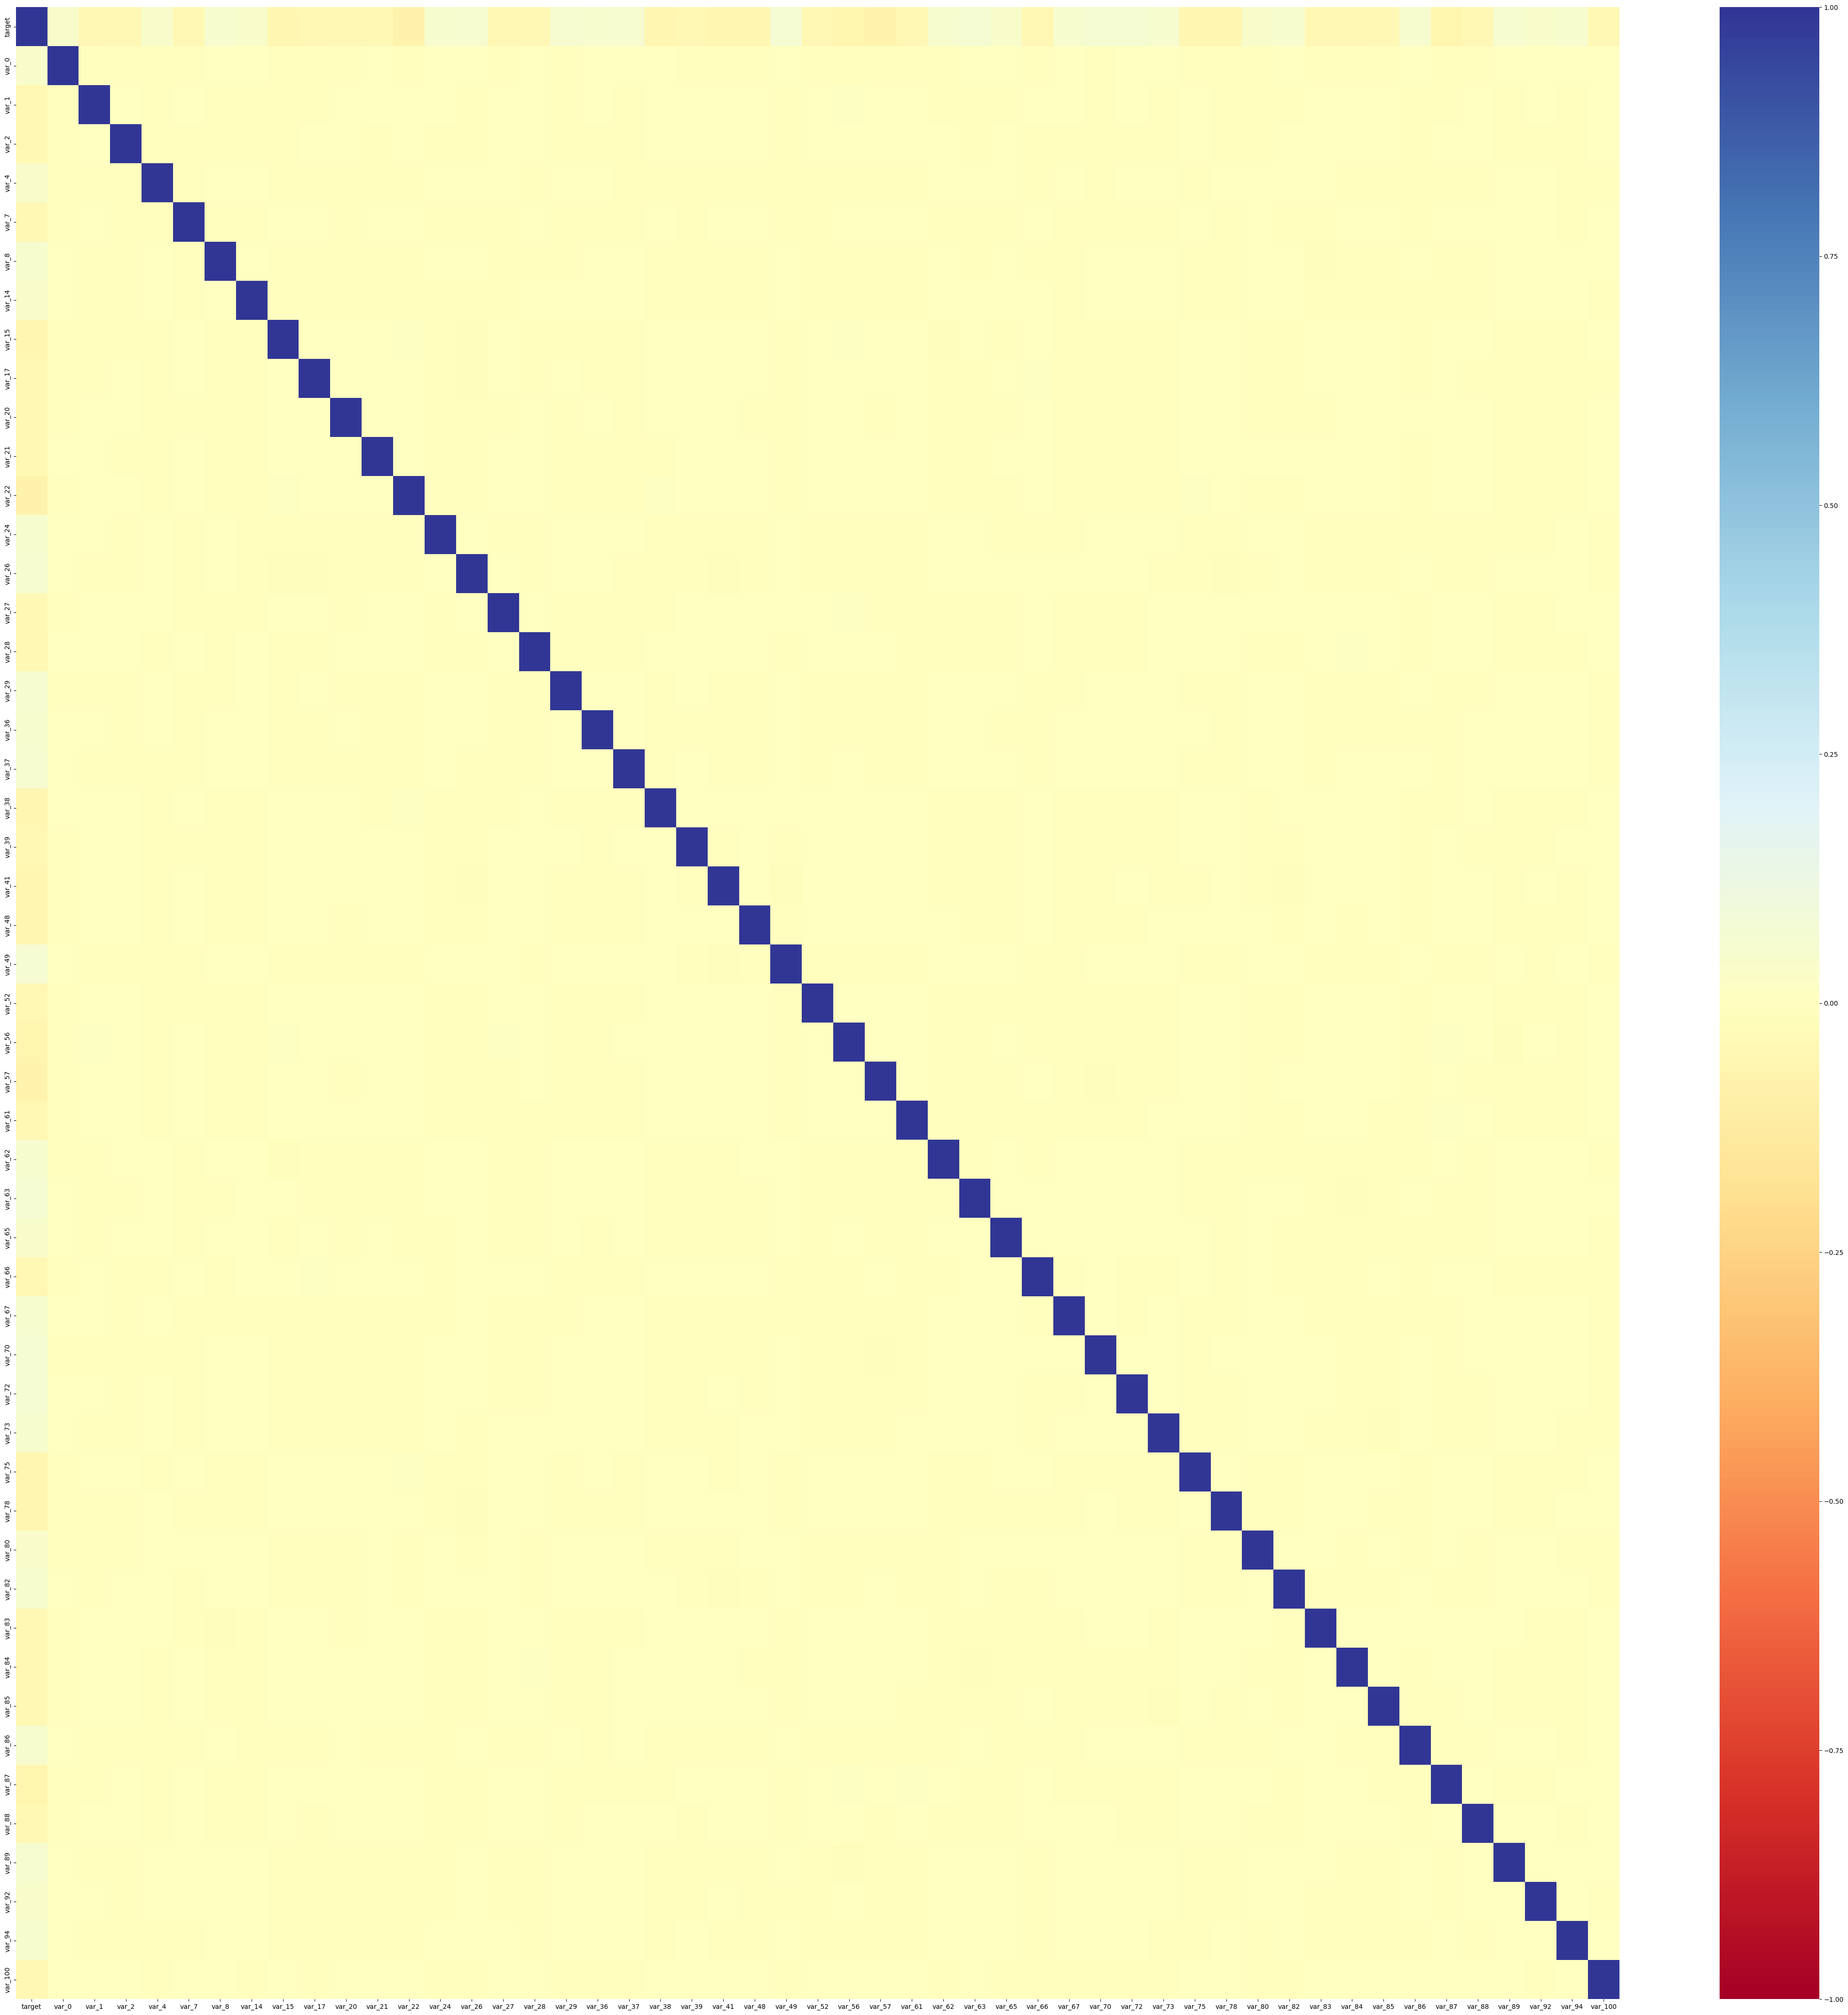

In [36]:
corr = train.select_dtypes(include='number').corr()
plt.figure(figsize=(55,55))
sns.heatmap(corr, cmap='RdYlBu', vmin = -1, vmax = 1);

array([[<Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'var_0'}>,
        <Axes: title={'center': 'var_1'}>,
        <Axes: title={'center': 'var_2'}>,
        <Axes: title={'center': 'var_4'}>,
        <Axes: title={'center': 'var_7'}>,
        <Axes: title={'center': 'var_8'}>],
       [<Axes: title={'center': 'var_14'}>,
        <Axes: title={'center': 'var_15'}>,
        <Axes: title={'center': 'var_17'}>,
        <Axes: title={'center': 'var_20'}>,
        <Axes: title={'center': 'var_21'}>,
        <Axes: title={'center': 'var_22'}>,
        <Axes: title={'center': 'var_24'}>],
       [<Axes: title={'center': 'var_26'}>,
        <Axes: title={'center': 'var_27'}>,
        <Axes: title={'center': 'var_28'}>,
        <Axes: title={'center': 'var_29'}>,
        <Axes: title={'center': 'var_36'}>,
        <Axes: title={'center': 'var_37'}>,
        <Axes: title={'center': 'var_38'}>],
       [<Axes: title={'center': 'var_39'}>,
        <Axes: title={'center': 'va

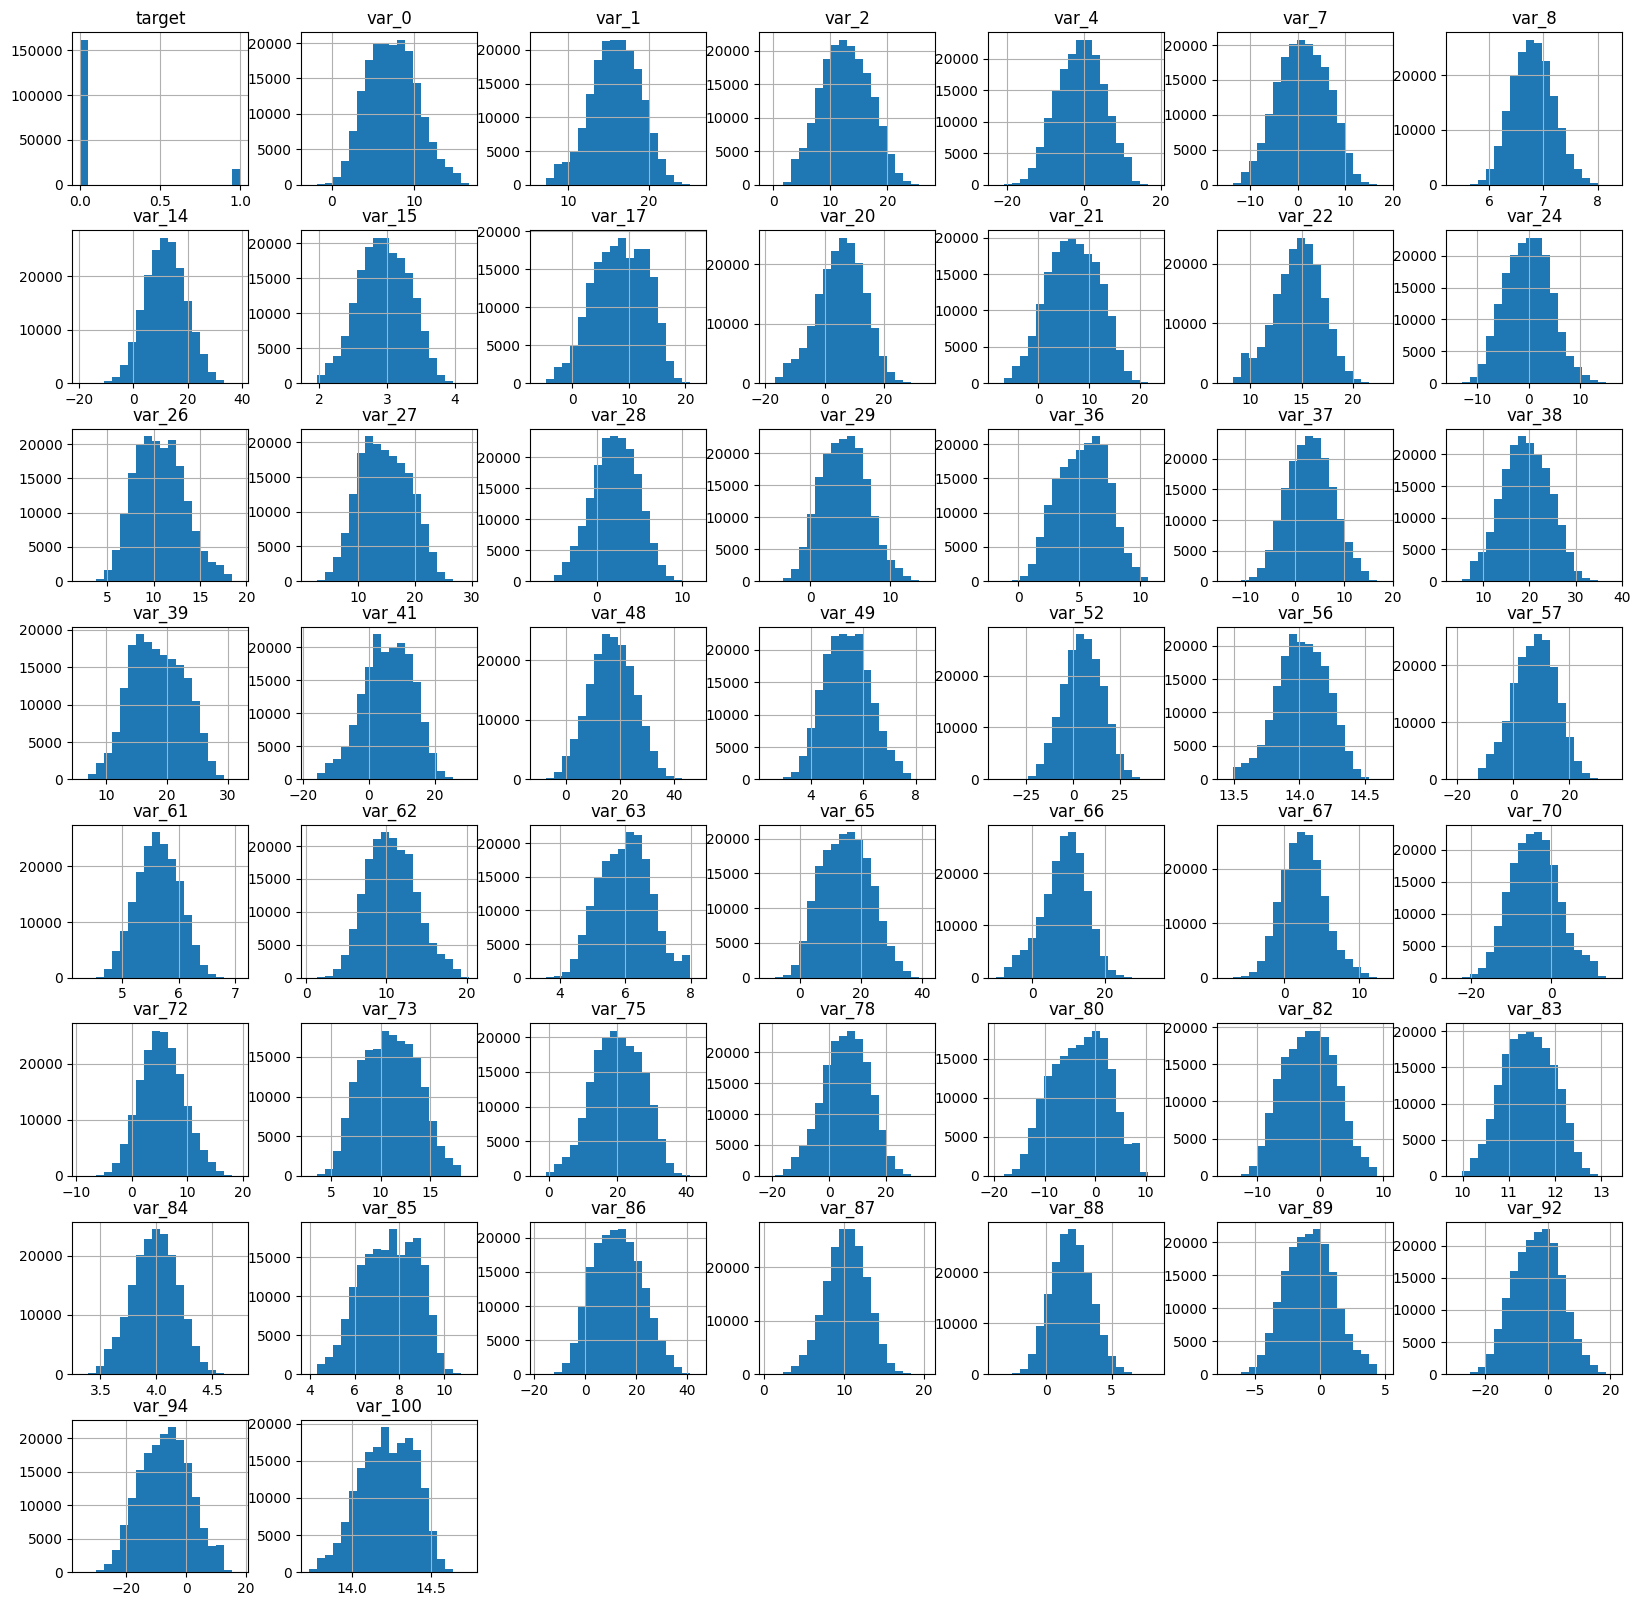

In [37]:
train.hist(figsize=(20,20), bins=20)

In [38]:
train.head()

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,0.0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
5,0.0,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
11,0.0,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
15,0.0,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
19,0.0,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275


In [39]:
train.size

9180000

In [40]:
train.shape

(180000, 51)

# "Crunch Numbers" Data Processing

In [41]:
#the split begins...
train_1 = train[train['target'] == 1]
train_0 = train[train['target'] == 0]
train_1.head(), train_0.head()

(     target   var_0    var_1    var_2    var_4    var_7   var_8   var_14  \
 57      1.0  8.9078  12.1321   9.4707  -5.8102   0.4521  7.1264  15.6935   
 125     1.0  6.2143  20.0990  23.5009  -0.8917  -3.9167  6.6863  21.4162   
 151     1.0  8.9083  12.1117  18.0359  -4.9628  10.1135  6.8962  11.4553   
 155     1.0  6.5612  13.9638   5.1980  12.1092   8.4874  6.4781  16.9541   
 302     1.0  4.4616   9.7572  12.9317   7.6485   0.6382  5.8025  22.4577   
 
      var_15   var_17  ...   var_83  var_84  var_85   var_86   var_87  var_88  \
 57   2.6980   4.3336  ...  11.2059  4.0237  5.8905  12.4865  10.1419  2.3370   
 125  2.8672   6.4550  ...  10.8110  3.9190  7.4971  35.7428   9.6149  2.2257   
 151  2.6735   2.1990  ...  11.6326  3.9193  5.0366  37.1453  17.0341  0.9987   
 155  2.0573   5.5008  ...  11.2981  4.1316  7.2193  -1.8139   1.8190  2.5720   
 302  3.0906  16.2501  ...  11.5449  4.0001  9.0639  11.8805   9.4678  1.0561   
 
      var_89   var_92   var_94  var_100  
 57  -

In [42]:
y = train['target']
y

,target
3,0.0
5,0.0
11,0.0
15,0.0
19,0.0
...,...
1049990,0.0
1049993,0.0
1049995,1.0
1049997,0.0


In [43]:
X = train.drop(columns='target')
X

,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,var_20,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,0.5878,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
5,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,6.5456,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
11,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,18.7893,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
15,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,1.1400,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
19,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,7.8002,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,7.9632,20.4650,10.7295,2.9322,5.0267,7.1953,10.0695,3.0732,11.0135,3.1549,...,12.1000,4.2019,7.1249,14.6591,10.2705,3.5833,2.5588,10.4219,-19.7158,14.0582
1049993,5.0862,14.4785,17.3709,-2.4732,-2.5987,6.6798,3.0420,2.4057,18.2729,3.9661,...,10.9960,3.9637,8.0217,11.0449,9.3100,1.0545,-2.8770,-2.8052,-13.7290,14.3794
1049995,11.3251,16.4148,20.5955,-6.3011,-6.8112,7.3226,14.9182,2.4579,14.7175,3.8858,...,11.2265,3.8431,8.2748,-7.8464,9.9774,1.7377,-1.7942,1.3921,-16.4925,14.4421
1049997,8.9941,13.4127,3.9567,3.5744,1.6614,6.1486,12.0996,2.5439,10.2936,2.0014,...,10.5067,4.0642,8.3381,17.9081,12.3357,2.6530,-1.2359,2.0836,-18.6168,14.0689


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)
X_train, X_test, y_train, y_test

(           var_0    var_1    var_2    var_4   var_7   var_8   var_14  var_15  \
 52921    11.6590  16.9409  18.9382  10.2871  4.5281  6.5839   7.5261  2.9233   
 340954    7.9360  18.9734  13.2990   1.5649 -1.5887  6.6148   3.9875  3.3772   
 917722   11.6883  14.7314  10.9512   3.6018 -1.1972  6.4599  -5.1767  3.0628   
 35788     8.3487  17.0831   9.5062  -2.1904  0.8256  7.1946   7.1987  2.3715   
 655969    9.5059  15.0808   9.9741   1.9580 -6.9709  6.5204  17.9815  2.5103   
 ...          ...      ...      ...      ...     ...     ...      ...     ...   
 861601    4.8227  19.9481   9.7743   2.8185 -0.5823  7.1467   0.7321  3.0549   
 483056    1.1730  17.9136   7.1386   1.1141  5.1515  6.6304   9.3522  2.8682   
 173021    2.9492  21.5498  13.3308  -9.0061 -2.5924  6.8451   5.9499  2.9061   
 1010344   2.4780  17.8193   9.5998  -1.1325  9.5983  6.5100  24.7985  2.7427   
 450777    7.9940  18.2556  17.8820  -4.2465  6.6723  6.6946   7.3164  2.6512   
 
           var_17   var_20

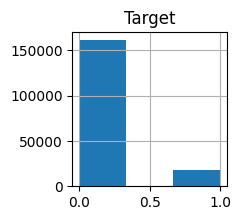

In [45]:
#This histogram illustrates that target value count is very lopsided.
train['target'].hist(figsize=(2,2), bins=3)
plt.title('Target') ;

<Axes: >

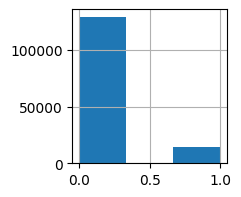

In [46]:
y_train.hist(figsize=(2,2), bins=3)

<Axes: >

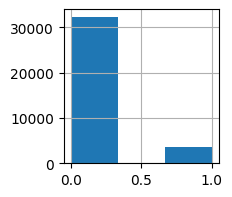

In [47]:
y_test.hist(figsize=(2,2), bins=3)

In [48]:
gnb = GaussianNB()

In [49]:
gnb.fit(X_train, y_train)

GaussianNB()

In [50]:
y_pred = gnb.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [51]:
y_test.values

array([0., 0., 1., ..., 0., 1., 0.])

In [52]:
(y_pred - y_test).values * 100

array([   0.,    0., -100., ...,    0.,    0.,    0.])

In [53]:
(y_pred - y_test).abs().sum()

np.float64(3225.0)

In [54]:
#accuracy of how many you got right compared to whole.
(1-(y_pred - y_test).abs().mean())*100

np.float64(91.04166666666667)

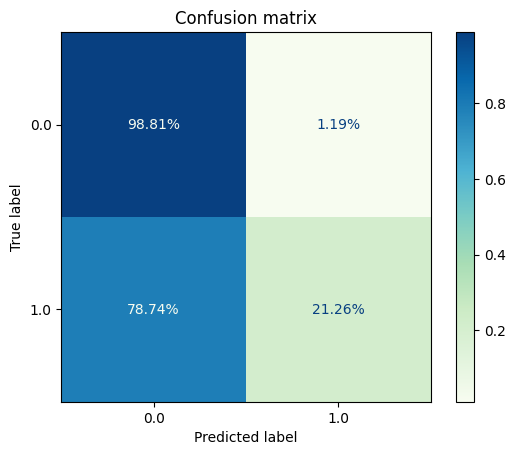

In [55]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;


In [56]:
results = []
for i in range(500):
  # train test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

  # initialize model
  gnb = GaussianNB()

  # fit model
  gnb.fit(X_train, y_train)

  # predict
  y_pred = gnb.predict(X_test)

  # performance & record
  results.append( (1-(y_pred - y_test).abs().mean())*100 )

In [57]:
results

[np.float64(91.25),
 np.float64(91.26388888888889),
 np.float64(91.18611111111112),
 np.float64(91.20277777777778),
 np.float64(91.21944444444445),
 np.float64(91.04444444444444),
 np.float64(90.90555555555555),
 np.float64(91.02777777777777),
 np.float64(91.19722222222222),
 np.float64(91.20833333333334),
 np.float64(91.28055555555555),
 np.float64(91.1138888888889),
 np.float64(91.05833333333334),
 np.float64(91.18611111111112),
 np.float64(90.95277777777778),
 np.float64(90.97777777777777),
 np.float64(91.07222222222222),
 np.float64(91.22222222222223),
 np.float64(91.18611111111112),
 np.float64(90.95833333333333),
 np.float64(91.1138888888889),
 np.float64(91.17222222222222),
 np.float64(91.10000000000001),
 np.float64(90.94444444444446),
 np.float64(91.36111111111111),
 np.float64(91.3638888888889),
 np.float64(91.25833333333333),
 np.float64(91.14999999999999),
 np.float64(91.13888888888889),
 np.float64(90.98888888888888),
 np.float64(91.23055555555555),
 np.float64(91.31111111

Text(0, 0.5, 'Score Counts')

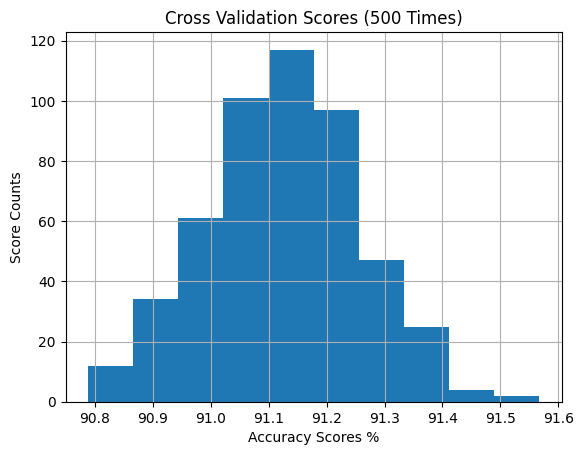

In [58]:

pd.Series(results).hist()
plt.title("Cross Validation Scores (500 Times)")
plt.xlabel("Accuracy Scores %")
plt.ylabel("Score Counts")

In [59]:
corr =train.corr()
corr

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
target,1.000000,0.045506,-0.051718,-0.046433,0.041593,-0.041987,0.052457,0.045281,-0.057373,-0.054375,...,-0.052324,-0.053733,-0.042073,0.047543,-0.063871,-0.042765,0.059306,0.040520,0.049072,-0.047005
var_0,0.045506,1.000000,-0.000892,-0.000225,-0.000269,-0.001320,0.002949,0.002901,-0.007758,-0.002799,...,-0.004960,-0.005451,-0.000716,0.004577,-0.004664,-0.001088,0.000236,0.001668,0.001837,0.001475
var_1,-0.051718,-0.000892,1.000000,0.006064,-0.000821,0.000783,-0.007127,-0.006180,-0.002585,-0.001663,...,0.004265,0.002411,0.001484,-0.003859,-0.000485,0.003141,-0.006188,0.000071,-0.003682,0.003964
var_2,-0.046433,-0.000225,0.006064,1.000000,-0.003427,-0.000108,-0.001809,-0.002786,-0.001177,0.006360,...,0.004890,0.002240,0.001980,-0.001161,0.003921,0.002087,-0.004422,-0.003418,-0.001565,0.002418
var_4,0.041593,-0.000269,-0.000821,-0.003427,1.000000,-0.002750,0.003347,0.001377,-0.004732,-0.001814,...,0.000657,-0.005267,-0.004266,-0.004179,-0.004211,-0.002330,0.000254,0.001090,-0.000468,-0.002807
var_7,-0.041987,-0.001320,0.000783,-0.000108,-0.002750,1.000000,-0.003199,-0.003588,0.002329,0.004282,...,-0.000412,0.003262,0.002574,-0.001824,0.001186,0.002811,0.001306,0.000236,-0.000568,0.004575
var_8,0.052457,0.002949,-0.007127,-0.001809,0.003347,-0.003199,1.000000,0.003472,-0.003858,-0.002727,...,-0.008394,-0.004254,-0.002446,0.001117,-0.003713,-0.003929,0.003837,0.003422,0.003204,0.000821
var_14,0.045281,0.002901,-0.006180,-0.002786,0.001377,-0.003588,0.003472,1.000000,-0.007115,-0.004249,...,-0.002214,-0.002179,-0.003054,-0.000160,-0.000504,-0.004046,0.003136,0.005715,0.001501,-0.000106
var_15,-0.057373,-0.007758,-0.002585,-0.001177,-0.004732,0.002329,-0.003858,-0.007115,1.000000,0.002467,...,0.000581,0.006633,0.004569,-0.001573,0.003251,0.003066,-0.001541,-0.003719,-0.002825,0.004247
var_17,-0.054375,-0.002799,-0.001663,0.006360,-0.001814,0.004282,-0.002727,-0.004249,0.002467,1.000000,...,0.005578,0.001237,0.000210,-0.002714,0.004149,-0.002182,-0.002642,-0.001968,-0.004100,-0.000822


In [60]:
def cross_validate(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

In [61]:
accuracy_scores = cross_validate(X, y, 500)
print(round(accuracy_scores.mean(), 5))

0.91133


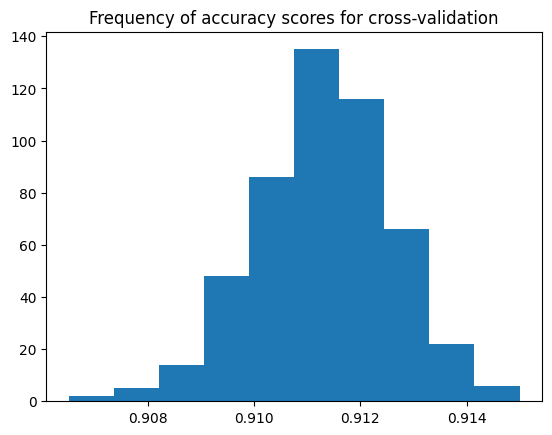

In [62]:
plt.hist(accuracy_scores)
plt.title('Frequency of accuracy scores for cross-validation')
plt.show()

Text(0.5, 0, 'Score Counts')

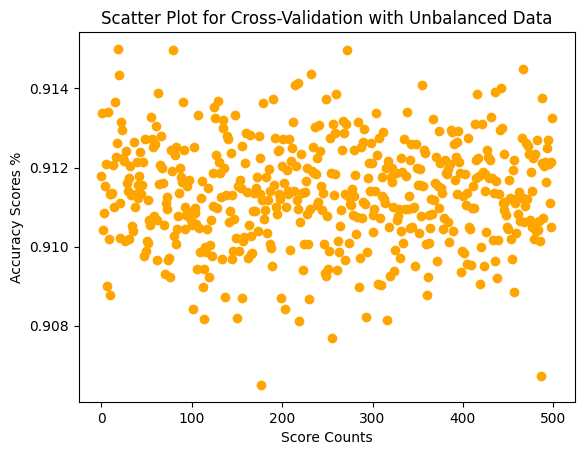

In [63]:
fig = plt.figure()
x = np.linspace(0, 10, 100)
plt.plot(accuracy_scores, '.');
plt.plot(accuracy_scores, 'o', color='orange',)
plt.title('Scatter Plot for Cross-Validation with Unbalanced Data')
plt.ylabel("Accuracy Scores %")
plt.xlabel("Score Counts")

In [64]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     32460
         1.0       0.68      0.23      0.34      3540

    accuracy                           0.91     36000
   macro avg       0.80      0.61      0.65     36000
weighted avg       0.90      0.91      0.89     36000



In [65]:
train_1.shape

(18040, 51)

In [88]:
train_1.shape[0]


18040

In [66]:
#Match the qty of rows of train 1 dataFrame to train 0, and take a random sample of that quantity.
n_rows = train_1.shape[0]
train_0 = train_0.sample(n_rows)
train_0

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
673314,0.0,9.5128,14.7545,13.2921,0.0859,-5.8886,6.7763,19.0749,3.2778,8.2945,...,11.0627,4.3617,8.3568,5.9862,12.0823,3.0212,-2.9424,-14.4134,-14.6268,14.2551
368225,0.0,9.2687,11.8014,2.2495,7.7961,2.8614,7.5889,1.4997,2.6805,5.8538,...,12.0364,4.2224,6.7873,15.4007,9.4714,0.2607,-0.6605,-4.1057,-5.8528,14.0988
393746,0.0,3.8916,16.9057,14.0225,1.2342,-5.6134,6.8353,25.2517,3.5761,2.5599,...,11.4025,3.5873,6.4194,9.3859,11.7569,0.2267,-1.8312,-3.0458,1.5878,14.4789
659596,0.0,3.7925,16.9853,7.7822,-1.6641,7.4906,6.1987,14.8016,2.4134,2.9438,...,11.4167,3.8222,6.4111,18.3886,14.8566,2.7966,1.4095,-3.9687,-17.1644,13.9031
407312,0.0,5.6279,17.5800,13.9562,-9.9012,-1.8170,6.5943,10.3491,2.8324,3.6969,...,11.1912,4.1022,10.6022,19.2209,7.6838,1.0395,-1.4382,2.8712,-11.7198,14.1945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192885,0.0,5.7984,15.2724,7.1081,1.3880,-3.3959,6.6785,12.2408,3.0006,14.1290,...,11.4115,3.9857,7.9037,7.7619,11.3790,-0.3463,3.9926,-13.6515,1.4454,14.3248
818034,0.0,6.3172,11.7954,11.5168,4.7950,-0.8605,6.5139,5.8030,2.4796,1.6191,...,11.3131,3.9751,7.7918,18.0996,11.9212,1.3070,1.3158,0.2620,-9.6896,14.3666
783047,0.0,10.2130,15.2523,18.9682,-0.7470,3.4396,7.2114,8.6807,2.6410,7.9707,...,11.8034,4.1138,7.0972,-3.5025,7.7987,0.9837,-3.6949,-4.5758,1.0583,14.1993
70199,0.0,11.5565,13.9795,16.9329,-6.8301,-6.9497,6.8812,6.4711,3.1979,-2.1931,...,11.0941,3.7690,7.0594,8.0112,13.0967,0.1213,-3.4235,4.1626,0.3701,13.9770


In [67]:
# With our powers combined, we are a balanced data set!!!! (Combined train 1 and train 0)
frame = [train_1, train_0]
train_bal =pd.concat(frame)
train_bal

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
57,1.0,8.9078,12.1321,9.4707,-5.8102,0.4521,7.1264,15.6935,2.6980,4.3336,...,11.2059,4.0237,5.8905,12.4865,10.1419,2.3370,-3.1553,-12.6928,-3.0833,14.1895
125,1.0,6.2143,20.0990,23.5009,-0.8917,-3.9167,6.6863,21.4162,2.8672,6.4550,...,10.8110,3.9190,7.4971,35.7428,9.6149,2.2257,-0.5949,-9.4101,-15.6555,14.4514
151,1.0,8.9083,12.1117,18.0359,-4.9628,10.1135,6.8962,11.4553,2.6735,2.1990,...,11.6326,3.9193,5.0366,37.1453,17.0341,0.9987,-3.0163,-1.5409,-7.6389,14.1725
155,1.0,6.5612,13.9638,5.1980,12.1092,8.4874,6.4781,16.9541,2.0573,5.5008,...,11.2981,4.1316,7.2193,-1.8139,1.8190,2.5720,0.6780,6.4045,1.1754,14.1347
302,1.0,4.4616,9.7572,12.9317,7.6485,0.6382,5.8025,22.4577,3.0906,16.2501,...,11.5449,4.0001,9.0639,11.8805,9.4678,1.0561,-0.2107,9.8815,-2.9328,14.0933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192885,0.0,5.7984,15.2724,7.1081,1.3880,-3.3959,6.6785,12.2408,3.0006,14.1290,...,11.4115,3.9857,7.9037,7.7619,11.3790,-0.3463,3.9926,-13.6515,1.4454,14.3248
818034,0.0,6.3172,11.7954,11.5168,4.7950,-0.8605,6.5139,5.8030,2.4796,1.6191,...,11.3131,3.9751,7.7918,18.0996,11.9212,1.3070,1.3158,0.2620,-9.6896,14.3666
783047,0.0,10.2130,15.2523,18.9682,-0.7470,3.4396,7.2114,8.6807,2.6410,7.9707,...,11.8034,4.1138,7.0972,-3.5025,7.7987,0.9837,-3.6949,-4.5758,1.0583,14.1993
70199,0.0,11.5565,13.9795,16.9329,-6.8301,-6.9497,6.8812,6.4711,3.1979,-2.1931,...,11.0941,3.7690,7.0594,8.0112,13.0967,0.1213,-3.4235,4.1626,0.3701,13.9770


In [68]:
#Separate target and the rest of the columns.
X = train_bal.drop(columns='target')
X
y = train_bal['target']
y

,target
57,1.0
125,1.0
151,1.0
155,1.0
302,1.0
...,...
192885,0.0
818034,0.0
783047,0.0
70199,0.0


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train, X_test, y_train, y_test

(           var_0    var_1    var_2   var_4   var_7   var_8   var_14  var_15  \
 529296    4.9208  18.8342  20.2819  1.0843 -1.6097  6.8169  23.3294  2.7881   
 226168   12.3472  14.7622  15.7263  6.8421  2.5986  6.9948  20.7222  3.0504   
 638823   14.0521  11.8454  13.1543  1.9529  5.4943  6.4471   5.6215  2.8771   
 142522   15.5697  19.9020  12.9538  4.7967 -0.3210  7.4664   9.7185  2.8427   
 687424    3.6177  16.4501  13.3136  4.4307 -2.2828  6.9684  16.2590  3.1855   
 ...          ...      ...      ...     ...     ...     ...      ...     ...   
 1042649   7.7891  20.6627  18.6358 -9.6820  7.8286  7.1785  -8.8372  2.6443   
 571110    4.8394  17.7763  18.3116  0.7570 -5.2405  6.8702  22.9304  3.0888   
 653022    6.2715  15.1542  10.0457 -1.6089  1.8080  6.4739  13.5435  2.3821   
 738213    4.6265  17.2298  14.0703  7.3730  8.6886  6.9099  17.8172  2.5932   
 163437    9.1576  19.4606  22.2311  6.9241 -0.0224  7.3188  18.7337  2.0691   
 
           var_17   var_20  ...   var_

Text(0, 0.5, 'Value Count')

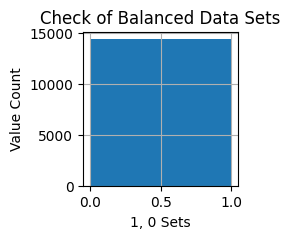

In [70]:
#Visual check of how balanced test and train data sets
y_train.hist(figsize=(2,2), bins=2)
plt.title("Check of Balanced Data Sets")
plt.xlabel("1, 0 Sets")
plt.ylabel("Value Count")

After we established that there is a numerically balanced set, it's time to crunch numbers again.  Peanuts.

In [71]:
gnb = GaussianNB()

In [72]:
gnb.fit(X_train, y_train)

GaussianNB()

In [73]:
y_pred = gnb.predict(X_test)
y_pred

array([0., 0., 1., ..., 1., 1., 1.])

In [74]:
y_test.values

array([0., 0., 1., ..., 1., 1., 1.])

In [75]:
(y_pred - y_test).values * 100

array([0., 0., 0., ..., 0., 0., 0.])

In [76]:
(y_pred - y_test).abs().sum()

np.float64(1839.0)

In [77]:
#accuracy of how many you got right compared to whole.
(1-(y_pred - y_test).abs().mean())*100

np.float64(74.5149667405765)

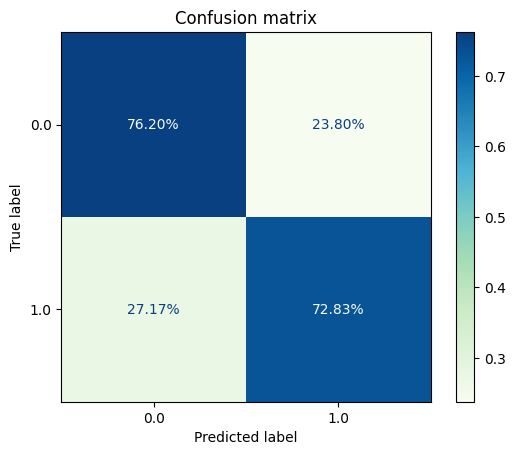

In [78]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;


In [79]:
results = []
for i in range(500):
  # tts
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

  # init model
  gnb = GaussianNB()

  # fit model
  gnb.fit(X_train, y_train)

  # predict
  y_pred = gnb.predict(X_test)

  # performance & record
  results.append( (1-(y_pred - y_test).abs().mean())*100 )

In [80]:
accuracy_scores_bal = cross_validate(X, y, 100)
print(round(accuracy_scores_bal.mean(), 5))

0.75304


In [81]:
results

[np.float64(76.10864745011087),
 np.float64(75.66518847006651),
 np.float64(75.37416851441242),
 np.float64(75.36031042128603),
 np.float64(74.75055432372505),
 np.float64(74.55654101995566),
 np.float64(75.01385809312639),
 np.float64(75.76219512195121),
 np.float64(75.34645232815964),
 np.float64(74.73669623059867),
 np.float64(75.01385809312639),
 np.float64(75.41574279379158),
 np.float64(75.62361419068736),
 np.float64(75.22172949002217),
 np.float64(75.67904656319291),
 np.float64(74.63968957871397),
 np.float64(75.56818181818181),
 np.float64(75.67904656319291),
 np.float64(75.4850332594235),
 np.float64(75.22172949002217),
 np.float64(75.33259423503326),
 np.float64(75.70676274944567),
 np.float64(75.67904656319291),
 np.float64(75.3880266075388),
 np.float64(75.36031042128603),
 np.float64(74.98614190687361),
 np.float64(75.27716186252772),
 np.float64(75.44345898004434),
 np.float64(75.26330376940133),
 np.float64(76.01164079822617),
 np.float64(75.1940133037694),
 np.float64

Text(0, 0.5, 'Score Counts')

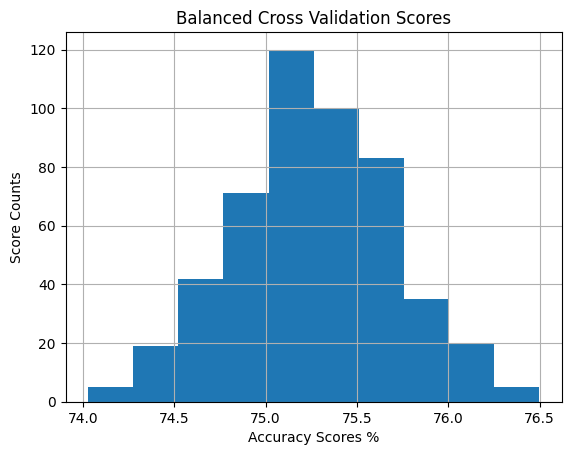

In [82]:
pd.Series(results).hist()
plt.title("Balanced Cross Validation Scores")
plt.xlabel("Accuracy Scores %")
plt.ylabel("Score Counts")

In [83]:
corr =train.corr()
corr

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
target,1.000000,0.045506,-0.051718,-0.046433,0.041593,-0.041987,0.052457,0.045281,-0.057373,-0.054375,...,-0.052324,-0.053733,-0.042073,0.047543,-0.063871,-0.042765,0.059306,0.040520,0.049072,-0.047005
var_0,0.045506,1.000000,-0.000892,-0.000225,-0.000269,-0.001320,0.002949,0.002901,-0.007758,-0.002799,...,-0.004960,-0.005451,-0.000716,0.004577,-0.004664,-0.001088,0.000236,0.001668,0.001837,0.001475
var_1,-0.051718,-0.000892,1.000000,0.006064,-0.000821,0.000783,-0.007127,-0.006180,-0.002585,-0.001663,...,0.004265,0.002411,0.001484,-0.003859,-0.000485,0.003141,-0.006188,0.000071,-0.003682,0.003964
var_2,-0.046433,-0.000225,0.006064,1.000000,-0.003427,-0.000108,-0.001809,-0.002786,-0.001177,0.006360,...,0.004890,0.002240,0.001980,-0.001161,0.003921,0.002087,-0.004422,-0.003418,-0.001565,0.002418
var_4,0.041593,-0.000269,-0.000821,-0.003427,1.000000,-0.002750,0.003347,0.001377,-0.004732,-0.001814,...,0.000657,-0.005267,-0.004266,-0.004179,-0.004211,-0.002330,0.000254,0.001090,-0.000468,-0.002807
var_7,-0.041987,-0.001320,0.000783,-0.000108,-0.002750,1.000000,-0.003199,-0.003588,0.002329,0.004282,...,-0.000412,0.003262,0.002574,-0.001824,0.001186,0.002811,0.001306,0.000236,-0.000568,0.004575
var_8,0.052457,0.002949,-0.007127,-0.001809,0.003347,-0.003199,1.000000,0.003472,-0.003858,-0.002727,...,-0.008394,-0.004254,-0.002446,0.001117,-0.003713,-0.003929,0.003837,0.003422,0.003204,0.000821
var_14,0.045281,0.002901,-0.006180,-0.002786,0.001377,-0.003588,0.003472,1.000000,-0.007115,-0.004249,...,-0.002214,-0.002179,-0.003054,-0.000160,-0.000504,-0.004046,0.003136,0.005715,0.001501,-0.000106
var_15,-0.057373,-0.007758,-0.002585,-0.001177,-0.004732,0.002329,-0.003858,-0.007115,1.000000,0.002467,...,0.000581,0.006633,0.004569,-0.001573,0.003251,0.003066,-0.001541,-0.003719,-0.002825,0.004247
var_17,-0.054375,-0.002799,-0.001663,0.006360,-0.001814,0.004282,-0.002727,-0.004249,0.002467,1.000000,...,0.005578,0.001237,0.000210,-0.002714,0.004149,-0.002182,-0.002642,-0.001968,-0.004100,-0.000822


In [84]:
accuracy_scores_bal = cross_validate(X, y, 500)
print(round(accuracy_scores_bal.mean(), 5))

0.75232


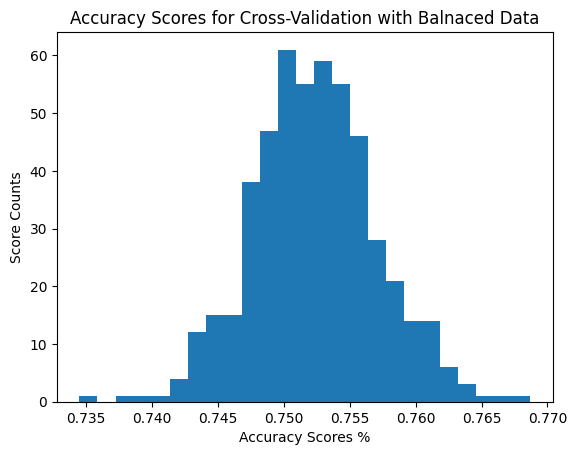

In [85]:
plt.hist(accuracy_scores_bal, bins=25)
plt.title('Accuracy Scores for Cross-Validation with Balnaced Data')
plt.xlabel("Accuracy Scores %")
plt.ylabel("Score Counts")
plt.show()


In [86]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76      3663
         1.0       0.76      0.75      0.75      3553

    accuracy                           0.76      7216
   macro avg       0.76      0.76      0.76      7216
weighted avg       0.76      0.76      0.76      7216



# "Lets Plot" Data Visualization

Text(0.5, 0, 'Score Counts')

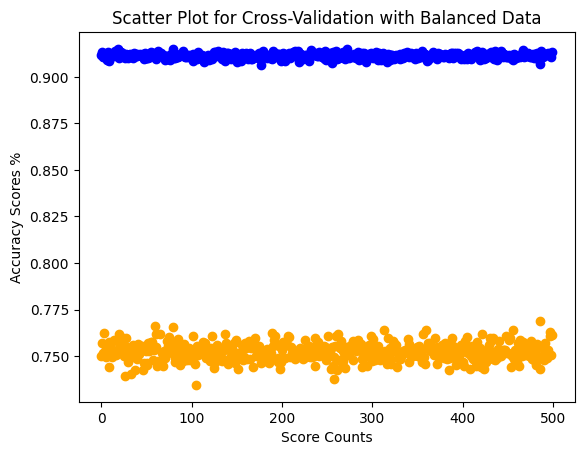

In [87]:
fig = plt.figure()
x = np.linspace(0, 10, 100)
plt.plot(accuracy_scores, '.');
plt.plot(accuracy_scores, 'o', color='blue',)
plt.plot(accuracy_scores_bal, '.');
plt.plot(accuracy_scores_bal, 'o', color='orange',)

plt.title('Scatter Plot for Cross-Validation with Balanced Data')
plt.ylabel("Accuracy Scores %")
plt.xlabel("Score Counts")


# Communication of Results

We created a prediction model to test whether customer will purchase items based on their data with average of 76% accuracy.